In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
dataPath = '/content/drive/MyDrive/Colab Notebooks/Wprowadzenie do AI/praca domowa 1/House_Price.csv'

df = pd.read_csv(dataPath)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['yr_built']
df.drop(columns=['yr_built'], inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,street,city,statezip,country,age
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,69
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,0,709 W Blaine St,Seattle,WA 98119,USA,103
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,58
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,0,857 170th Pl NE,Bellevue,WA 98008,USA,61
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1992,9105 170th Ave NE,Redmond,WA 98052,USA,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1979,501 N 143rd St,Seattle,WA 98133,USA,70
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,41
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,15
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,0,5148 S Creston St,Seattle,WA 98178,USA,50


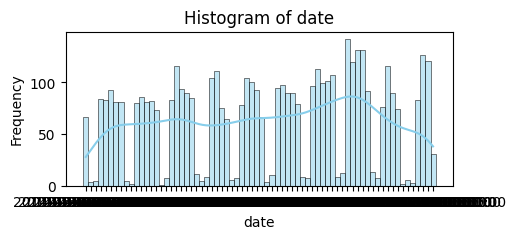

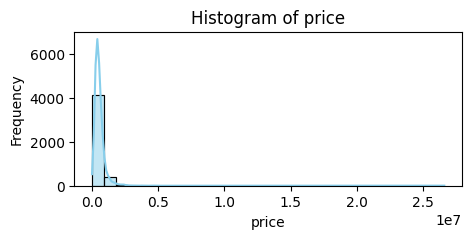

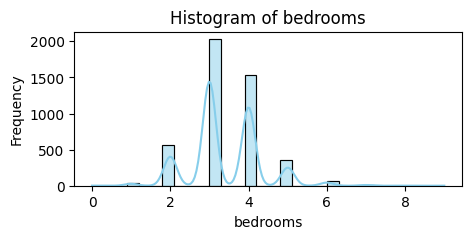

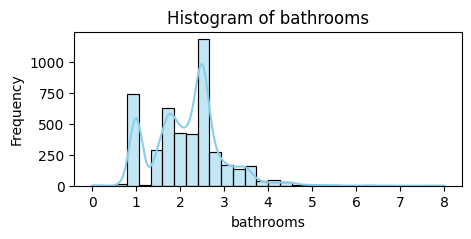

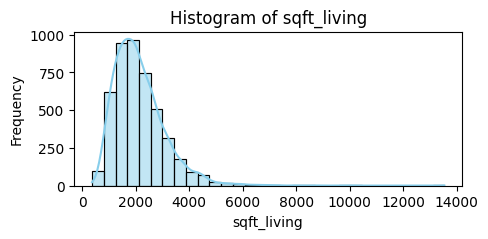

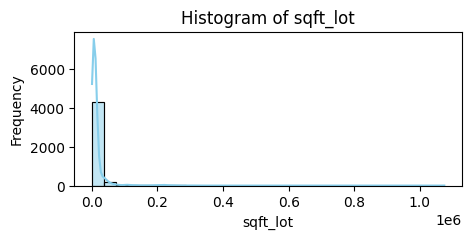

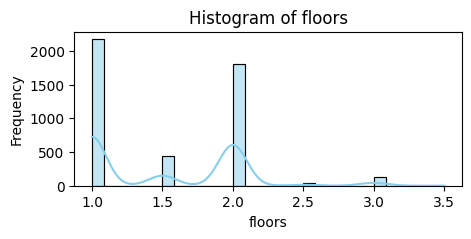

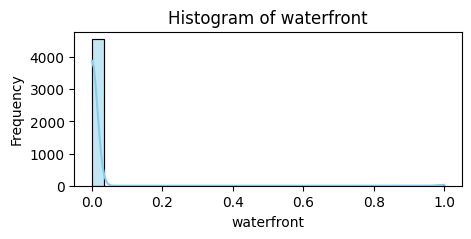

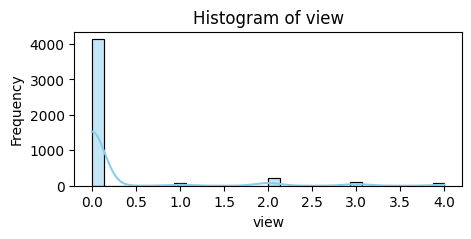

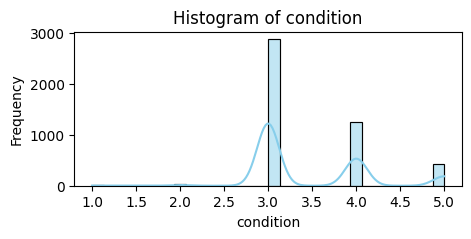

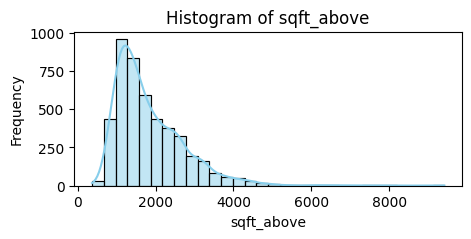

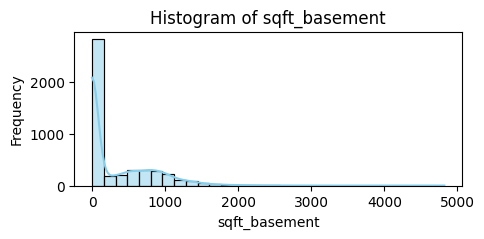

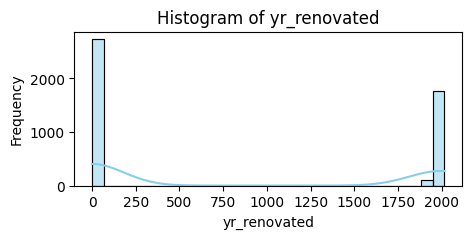

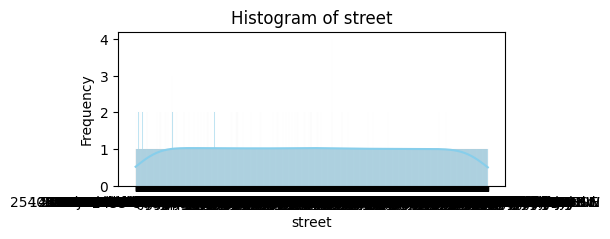

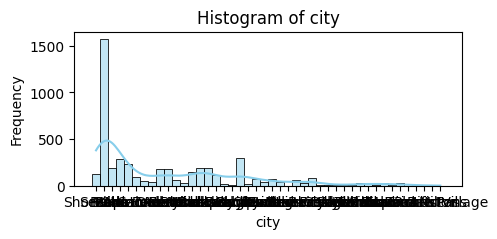

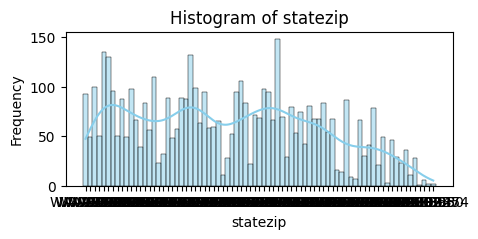

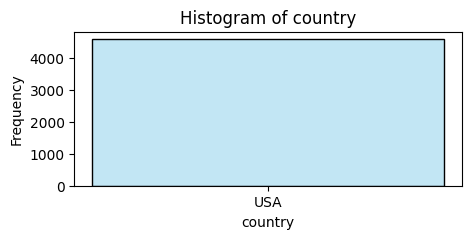

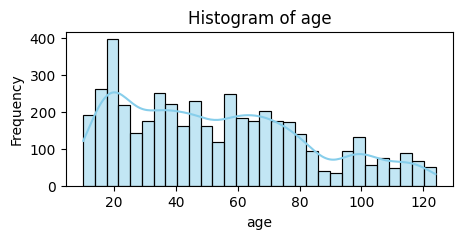

In [5]:
# df.hist(bins=20, figsize=(15, 10))
# plt.show()

for feature in df.columns:
    plt.figure(figsize=(5, 2))
    sns.histplot(data=df, x=feature, kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [5]:
# turn categorical values into numerical ones
df = pd.get_dummies(df, columns=['date', 'street', 'city', 'statezip', 'country'])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,country_USA
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,False,False,False,False,False,False,False,False,False,True
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,False,False,False,False,False,False,False,False,False,True
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,False,False,False,False,False,False,False,False,False,True
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,False,False,False,False,False,False,False,False,False,True
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,False,False,False,False,False,False,False,False,False,True


### Data exploration

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,age
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,808.608261,53.213696
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,979.414536,29.731848
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,0.000000,10.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,0.000000,27.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,0.000000,48.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1999.000000,73.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,124.000000


In [7]:
# Correlation
corr = df.corr()

In [ ]:
# Heatmap
plt.figure(figsize = (14, 5))

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Linear Regression

In [8]:
X = df.drop(columns=['price'])
y = df['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Train the model using the training sets
clf = LinearRegression().fit(X_train, y_train)

### Predictions And Model Matching Metrics

In [11]:
# Make predictions using the testing set
y_pred = clf.predict(X_test)

### Linear
# The coefficients
print("Coefficients: ", clf.coef_)
# The mean squared error
mean_sqr_error = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mean_sqr_error)
# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print("R squared: %.2f" % r2)

Coefficients:  [  20428.89921175 -147521.34432791     279.62094899 ...   45370.84762121
  108094.11631889       0.        ]
Mean squared error: 837839724455.62
R squared: -0.16


Text(0.5, 1.0, 'Regression: Predicted vs True y')

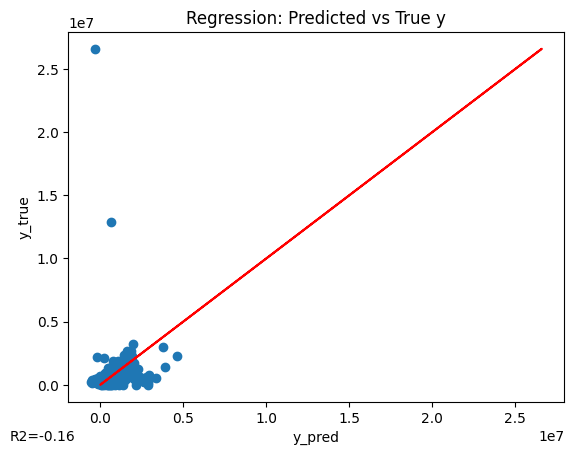

In [12]:
# Plot outputs

plt.scatter(y_pred, y_test)
plt.plot(y, y, '-r')
plt.annotate(r"R2={0}".format(round(r2, 3)), xy=(200, 200), xytext=(-65, -40), textcoords='offset points')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Regression: Predicted vs True y")

In [13]:
variance_score = explained_variance_score(y_test, y_pred)
variance_score

-0.15808381760936507

### Check which columns could be removed

In [55]:
# Calculating the absolute values of linear regression coefficients
linear_coef_abs = abs(clf.coef_)

# Creating a dictionary with features and their absolute coefficient values
features_coef = dict(zip(X.columns, linear_coef_abs))

# Sorting the features based on coefficient values
sorted_features = sorted(features_coef.items(), key=lambda x: x[1])

# Displaying the sorted features
for feature, coef in sorted_features:
    print(f"{feature}: {coef}")

# Selecting features with the smallest coefficient values for removal
features_to_remove = [feature for feature, coef in sorted_features[:50]]  # Selecting 50 features with the smallest coefficients

print("Features to remove:", features_to_remove)

street_12020 SE 76th St: 0.0
street_1500-1598 98th Ave NE: 0.0
street_17040 426th Ave SE: 0.0
street_17101-17103 SE 383rd St: 0.0
street_18305 Dayton Ave N: 0.0
street_22020 127th Ct SE: 0.0
street_22200 SE 255th St: 0.0
street_24811 SE 19th St: 0.0
street_25437 163rd Pl SE: 0.0
street_2559 NE 98th St: 0.0
street_26008 SE 23rd Pl: 0.0
street_26010 141st Ave SE: 0.0
street_26303 191st Pl SE: 0.0
street_28 M St NE: 0.0
street_2806 13th Ave W: 0.0
street_29742 129th Pl SE: 0.0
street_321 Hardie Ave NW: 0.0
street_33001 NE 24th St: 0.0
street_33023 SE 310th St: 0.0
street_3522 SW 107th St: 0.0
street_365 Halladay St: 0.0
street_3901 NE 5th Pl: 0.0
street_3934 S Hudson St: 0.0
street_4002 50th Ave SW: 0.0
street_4024 Phinney Ave N: 0.0
street_4104 S 179th St: 0.0
street_4117 Whitman Ave N: 0.0
street_412 NW 70th St: 0.0
street_4123 13th Ave S: 0.0
street_4129 Hampton Way: 0.0
street_4131 51st Ave S: 0.0
street_4136 258th Ave SE: 0.0
street_4140 53rd Ave SW: 0.0
street_415 NE 94th St: 0.0
st

### Liner regression after feature removal

In [23]:
features = ['price'] + features_to_remove

X1 = df.drop(columns=features)
y1 = df['price']

In [24]:
X1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,country_USA
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,...,False,False,False,False,False,False,False,False,False,True
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,...,False,False,False,False,False,False,False,False,False,True
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,...,False,False,False,False,False,False,False,False,False,True
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,...,False,False,False,False,False,False,False,False,False,True
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,...,False,False,False,False,False,False,False,False,False,True
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,...,False,False,False,False,False,False,False,False,False,True
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,...,False,False,False,False,False,False,False,False,False,True
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,...,False,False,False,True,False,False,False,False,False,True


In [25]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [26]:
# Train the model using the training sets
clf1 = LinearRegression().fit(X1_train, y1_train)

In [27]:
# Make predictions using the testing set
y1_pred = clf1.predict(X1_test)

### Linear
# The coefficients
print("Coefficients: ", clf.coef_)
# The mean squared error
mean_sqr_error_1 = mean_squared_error(y1_test, y1_pred)
print("Mean squared error: %.2f" % mean_sqr_error_1)
# The coefficient of determination: 1 is perfect prediction
r2_1 = r2_score(y1_test, y1_pred)
print("R squared: %.2f" % r2_1)

Coefficients:  [  20428.89921175 -147521.34432791     279.62094899 ...   45370.84762121
  108094.11631889       0.        ]
Mean squared error: 837839724455.21
R squared: -0.16


Text(0.5, 1.0, 'Regression: Predicted vs True y1')

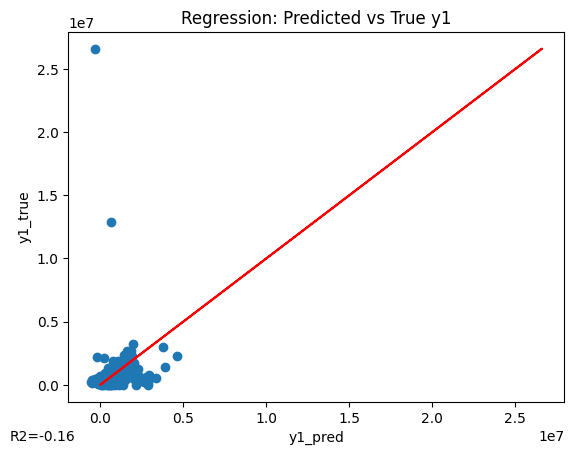

In [20]:
# Plot outputs

plt.scatter(y1_pred, y1_test)
plt.plot(y1, y1, '-r')
plt.annotate(r"R2={0}".format(round(r2_1, 3)), xy=(200, 200), xytext=(-65, -40), textcoords='offset points')
plt.xlabel("y1_pred")
plt.ylabel("y1_true")
plt.title("Regression: Predicted vs True y1")

### Linear regression without categorical data

Now I want to check how the model changed when not using categorical values for linear regression

In [57]:
df = pd.read_csv(dataPath)

In [58]:
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['yr_built']
df.drop(columns=['yr_built'], inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,street,city,statezip,country,age
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,69
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,0,709 W Blaine St,Seattle,WA 98119,USA,103
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,58
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,0,857 170th Pl NE,Bellevue,WA 98008,USA,61
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1992,9105 170th Ave NE,Redmond,WA 98052,USA,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1979,501 N 143rd St,Seattle,WA 98133,USA,70
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,41
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,15
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,0,5148 S Creston St,Seattle,WA 98178,USA,50


In [59]:
df.drop(columns=['date', 'street', 'city', 'statezip', 'country'], inplace=True)

In [60]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,age
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,808.608261,53.213696
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,979.414536,29.731848
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,0.000000,10.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,0.000000,27.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,0.000000,48.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1999.000000,73.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,124.000000


In [61]:
corr2 = df.corr()

In [62]:
corr2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,age
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,-0.028774,-0.021857
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,-0.061082,-0.142461
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,-0.215886,-0.463498
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,-0.122817,-0.287775
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,-0.022730,-0.050706
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,-0.233996,-0.467481
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,0.008625,0.023563
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,0.022967,0.064465
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.186818,0.399698
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,-0.160426,-0.408535


In [63]:
X2 = df.drop(columns=['price'])
y2 = df['price']

In [64]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [65]:
# Train the model using the training sets
clf2 = LinearRegression().fit(X2_train, y2_train)

In [66]:
# Make predictions using the testing set
y2_pred = clf2.predict(X2_test)

### Linear
# The coefficients
print("Coefficients: ", clf.coef_)
# The mean squared error
mean_sqr_error_2 = mean_squared_error(y2_test, y2_pred)
print("Mean squared error: %.2f" % mean_sqr_error_2)
# The coefficient of determination: 1 is perfect prediction
r2_2 = r2_score(y2_test, y2_pred)
print("R squared: %.2f" % r2_2)

Coefficients:  [  20428.89921175 -147521.34432791     279.62094899 ...   45370.84762121
  108094.11631889       0.        ]
Mean squared error: 679366480217.37
R squared: 0.06


Text(0.5, 1.0, 'Regression: Predicted vs True y2')

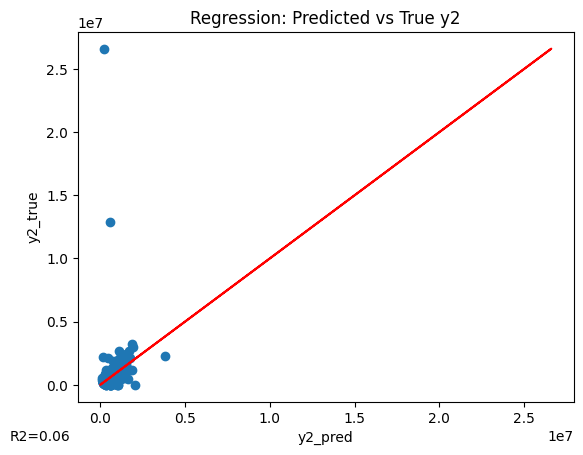

In [67]:
# Plot outputs

plt.scatter(y2_pred, y2_test)
plt.plot(y2, y2, '-r')
plt.annotate(r"R2={0}".format(round(r2_2, 3)), xy=(200, 200), xytext=(-65, -40), textcoords='offset points')
plt.xlabel("y2_pred")
plt.ylabel("y2_true")
plt.title("Regression: Predicted vs True y2")

The model is worse when having all the features (including categorical like street etc.) as R squared = -0.16 in comparison to the model which had those features removed (R squared = 0.06)